In [4]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

In [5]:
class LL:
    def __init__(self):
        self.head = None

    def add(self, key, value):
        new_node = Node(key, value)

        if self.head == None:
            self.head = new_node
        else:
            temp = self.head

            while temp.next != None:
                temp = temp.next

            temp.next = new_node

    def delete_head(self):
        if self.head == None:
            return "Empty"
        else:
            self.head = self.head.next

    def remove(self, key):
        if self.head.key == key:
            self.delete_head()
            return

        if self.head == None:
            return "Empty"
        else:
            temp = self.head

            while temp.next != None:
                if temp.next.key == key:
                    break
                temp = temp.next

            if temp.next == None:
                return "Not Found"
            else:
                temp.next = temp.next.next

    def traverse(self):
        temp = self.head

        while temp != None:
            print(temp.key, "-->", temp.value, " ", end=" ")
            temp = temp.next

    def size(self):
        temp = self.head
        counter = 0

        while temp != None:
            counter += 1
            temp = temp.next

        return counter

    def search(self, key):
        temp = self.head
        pos = 0

        while temp != None:
            if temp.key == key:
                return pos

            temp = temp.next
            pos += 1

        return -1

    def get_node_at_index(self, index):
        temp = self.head
        counter = 0

        while temp is not None:
            if counter == index:
                return temp
            temp = temp.next
            counter += 1

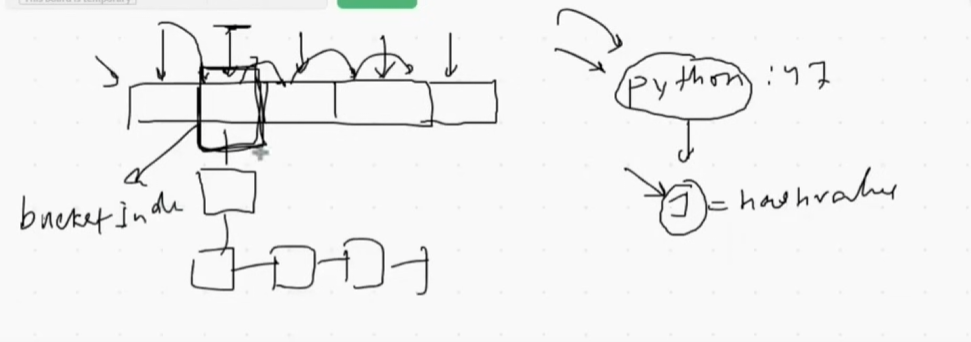

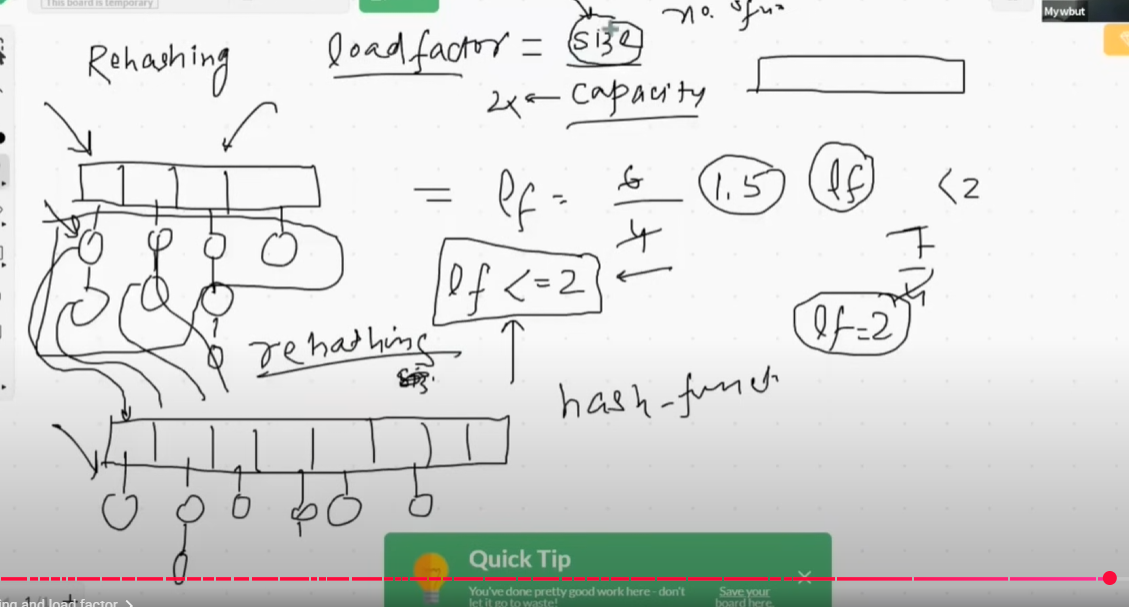

In [6]:
class Dictionary:
    def __init__(self, capacity):
        self.capacity = capacity
        self.size = 0
        # create array of LL
        self.buckets = self.make_array(self.capacity)

    def make_array(self, capacity):
        L = []
        for i in range(capacity):
            L.append(LL())
        return L

    def __setitem__(self, key, value):
        self.put(key, value)

    def __getitem__(self, key):
        return self.get(key)

    def __delitem__(self, key):
        bucket_index = self.hash_function(key)

        self.buckets[bucket_index].remove(key)

    def __str__(self):
        for i in self.buckets:
            i.traverse()

        return ""

    def __len__(self):
        return self.size

    def get(self, key):
        bucket_index = self.hash_function(key)

        res = self.buckets[bucket_index].search(key)

        if res == -1:
            return "Not Present"
        else:
            node = self.buckets[bucket_index].get_node_at_index(res)
            return node.value

    def put(self, key, value):
        bucket_index = self.hash_function(key)

        node_index = self.get_node_index(bucket_index, key)

        if node_index == -1:
            # insert
            self.buckets[bucket_index].add(key, value)
            self.size += 1

            load_factor = self.size / self.capacity
            print(load_factor)

            if load_factor >= 2:
                self.rehash()
        else:
            # update
            node = self.buckets[bucket_index].get_node_at_index(node_index)
            node.value = value

    def rehash(self):
        self.capacity = self.capacity * 2
        old_buckets = self.buckets
        self.size = 0
        self.buckets = self.make_array(self.capacity)

        for i in old_buckets:
            for j in range(i.size()):
                node = i.get_node_at_index(j)
                key_item = node.key
                value_item = node.value
                self.put(key_item, value_item)

    def get_node_index(self, bucket_index, key):
        node_index = self.buckets[bucket_index].search(key)

        return node_index

    def hash_function(self, key):
        return abs(hash(key)) % self.capacity


## test

In [ ]:
D1 = Dictionary(3)
D1.put("c",20000)
D1.put("Java",56)
D1.put("py",445)
D1.put("mike",456)
D1.put("kiu",654)

0.3333333333333333
0.6666666666666666
1.0
1.3333333333333333
1.6666666666666667
